In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
# create a dataframe to store results
mf_rbf_gpr_results = pd.DataFrame()
# use a for loop to read all csv files

input = pd.read_csv("exp_mf_rbf_gpr_input.csv", index_col=0)
output = pd.read_csv("exp_mf_rbf_gpr_output.csv", index_col=0)
# merge input and output dataframes
df = pd.merge(input, output, left_index=True, right_index=True)
mf_rbf_gpr_results = pd.concat([mf_rbf_gpr_results, df])

In [3]:
mf_rbf_gpr_results["problem"].unique()

array(['mf_Bohachevsky', 'mf_Booth', 'mf_Borehole', 'mf_CurrinExp',
       'mf_Hartman3', 'mf_Hartman6', 'mf_Park91A', 'mf_Park91B',
       'mf_Sixhump'], dtype=object)

In [4]:
mf_rbf_gpr_results_mf_bohachevsky = mf_rbf_gpr_results[
    mf_rbf_gpr_results["problem"] == "mf_Booth"
]

In [5]:
mf_rbf_gpr_results_mf_bohachevsky

,num_hf,num_lf,problem,seed,progress,linear_without_bias_normalized_mae,linear_without_bias_normalized_rmse,linear_without_bias_r2,linear_without_bias_cpu_time,linear_normalized_mae,linear_normalized_rmse,linear_r2,linear_cpu_time,quadratic_normalized_mae,quadratic_normalized_rmse,quadratic_r2,quadratic_cpu_time
100,2,100,mf_Booth,10,finished,1.605550,0.460546,0.823287,3.649356,1.610811,0.463717,0.820845,0.445981,1.703836,0.478186,0.809490,0.477026
101,4,100,mf_Booth,10,finished,0.121077,0.028647,0.999316,1.664403,1.325903,0.433581,0.843374,0.565447,1.516272,0.511272,0.782215,0.572493
102,6,100,mf_Booth,10,finished,0.007696,0.001346,0.999998,1.469204,0.007415,0.001299,0.999999,0.860600,0.006639,0.001613,0.999998,0.614843
103,8,100,mf_Booth,10,finished,0.004374,0.000633,1.000000,2.974126,0.004414,0.000626,1.000000,1.416044,0.003965,0.000589,1.000000,1.338188
104,10,100,mf_Booth,10,finished,0.001398,0.000229,1.000000,2.483241,0.001413,0.000240,1.000000,1.314455,0.000901,0.000142,1.000000,1.440638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,12,100,mf_Booth,19,finished,0.002273,0.000227,1.000000,0.789376,0.002355,0.000236,1.000000,0.926893,0.002168,0.000215,1.000000,0.883004
196,14,100,mf_Booth,19,finished,0.001335,0.000119,1.000000,0.821744,0.002474,0.000197,1.000000,0.834507,0.000922,0.000117,1.000000,1.501440
197,16,100,mf_Booth,19,finished,0.000535,0.000079,1.000000,1.472244,0.000636,0.000092,1.000000,1.488790,0.000764,0.000080,1.000000,1.642444
198,18,100,mf_Booth,19,finished,0.001514,0.000116,1.000000,1.199338,0.001844,0.000140,1.000000,0.923346,0.001785,0.000133,1.000000,1.753942


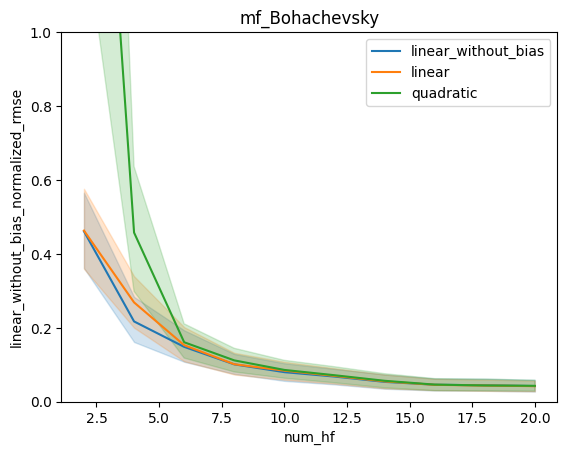

In [6]:
# plot the results for mf_Bohachevsky x-axis is num_hf and y-axis is r2 of different models
fig, ax = plt.subplots()
sns.lineplot(
    x="num_hf",
    y="linear_without_bias_normalized_rmse",
    data=mf_rbf_gpr_results,
    ax=ax,
    label="linear_without_bias",
)
sns.lineplot(
    x="num_hf",
    y="linear_normalized_rmse",
    data=mf_rbf_gpr_results,
    ax=ax,
    label="linear",
)
sns.lineplot(
    x="num_hf",
    y="quadratic_normalized_rmse",
    data=mf_rbf_gpr_results,
    ax=ax,
    label="quadratic",
)
plt.ylim(0, 1)
plt.title("mf_Bohachevsky")
plt.show()

In [7]:
# problem information
problem_sets = [
    "Bohachevsky",
    "Booth",
    "Borehole",
    "CurrinExp",
    "Hartman3",
    "Hartman6",
    "Park91A",
    "Park91B",
    "Sixhump",
]
dimensions = [2, 2, 8, 2, 3, 6, 4, 4, 2]
r2 = [0.857, 0.925, 1.000, 0.997, -0.196, 0.712, 0.994, 1.0000, 0.833]

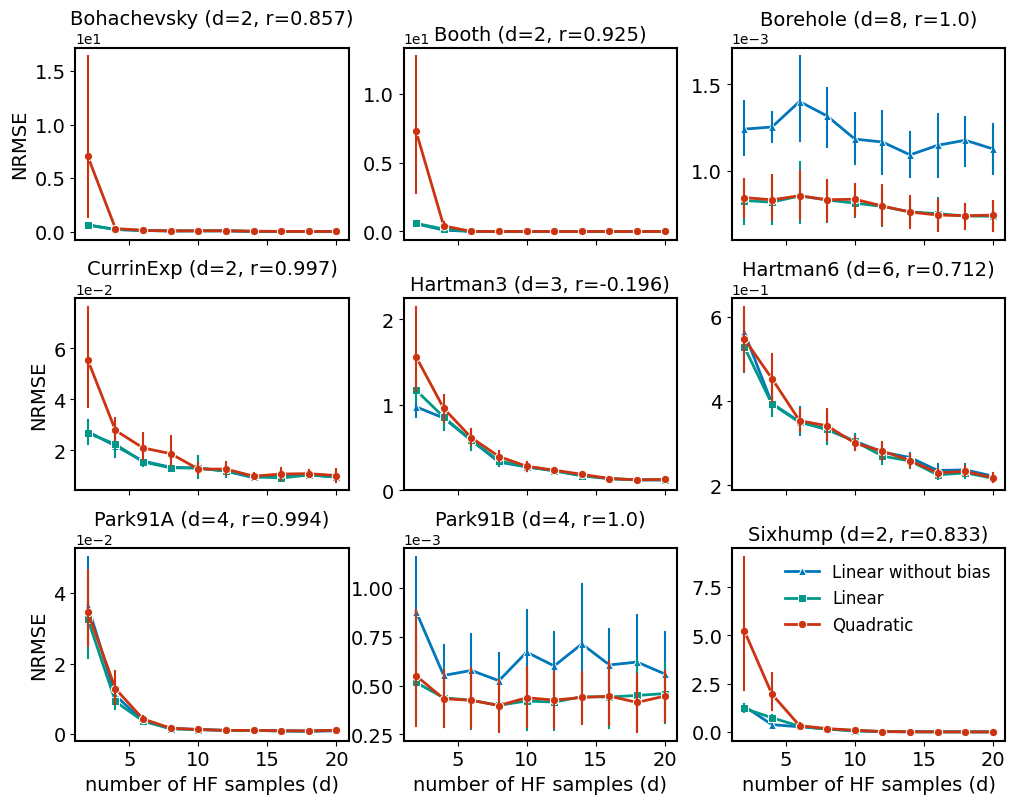

In [15]:
from matplotlib.ticker import FormatStrFormatter


problem_set = mf_rbf_gpr_results["problem"].unique()
font_size = 14
fig, ax = plt.subplots(3, 3, figsize=(12, 9))

for ii in range(3):
    for jj in range(3):
        problem = problem_set[ii * 3 + jj]
        result = mf_rbf_gpr_results[(mf_rbf_gpr_results["problem"] == problem)]
        if ii == 2:
            ax[ii, jj].set_xlabel(
                "number of HF samples (d)", fontsize=font_size)
        else:
            ax[ii, jj].set_xlabel(" ")
        if jj == 0:
            ax[ii, jj].set_ylabel("NRMSE", fontsize=font_size)
        else:
            ax[ii, jj].set_ylabel(" ")

        sns.lineplot(
            x="num_hf",
            y="linear_without_bias_normalized_rmse",
            data=result,
            ax=ax[ii, jj],
            err_style="bars",
            marker="^",
            legend="full",
            linewidth=2,
            label="Linear without bias",
            color="#0077BB"
        )
        sns.lineplot(
            x="num_hf",
            y="linear_normalized_rmse",
            data=result,
            marker="s",
            legend="full",
            linewidth=2,
            color="#009988",
            ax=ax[ii, jj],
            err_style="bars",
            label="Linear",
        )
        sns.lineplot(
            x="num_hf",
            y="quadratic_normalized_rmse",
            data=result,
            ax=ax[ii, jj],
            err_style="bars",
            marker="o",
            linewidth=2,
            label="Quadratic",
            color="#CC3311"
        )
        ax[ii, jj].tick_params(axis="y")
        ax[ii, jj].ticklabel_format(
            axis="y", style="scientific", scilimits=(0, 0))
        # only show legend on the last subplot
        if ii == 2 and jj == 2:
            ax[ii, jj].legend(
                loc="upper right",
                fontsize=12,
                frameon=False,
            )
        else:
            ax[ii, jj].get_legend().remove()
        # set the font of axis and y-axis precision
        ax[ii, jj].tick_params(axis="both", which="major", labelsize=font_size)
        for axis in ["top", "bottom", "left", "right"]:
            ax[ii, jj].spines[axis].set_linewidth(1.5)

        title = (
            problem_sets[ii * 3 + jj]
            + " (d="
            + str(dimensions[ii * 3 + jj])
            + ", r="
            + str(r2[ii * 3 + jj])
            + ")"
        )
        ax[ii, jj].set_title(title, fontsize=14)
        # set space between subplots
        plt.subplots_adjust(wspace=0.20, hspace=0.30)

for i in range(2):
    for j in range(3):
        # remove x tick label
        ax[i, j].set_xticklabels([])
plt.savefig("results_of_different_basis_orders.png",
            dpi=300, bbox_inches="tight")
plt.savefig("results_of_different_basis_orders.pdf",
            dpi=300, bbox_inches="tight")
plt.savefig("results_of_different_basis_orders.svg",
            dpi=300, bbox_inches="tight")
plt.show()